In [824]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

## 1. Dataset

In [825]:
dataset = pd.read_csv('Advertising.csv')

In [826]:
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
dataset

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [828]:
dataset.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


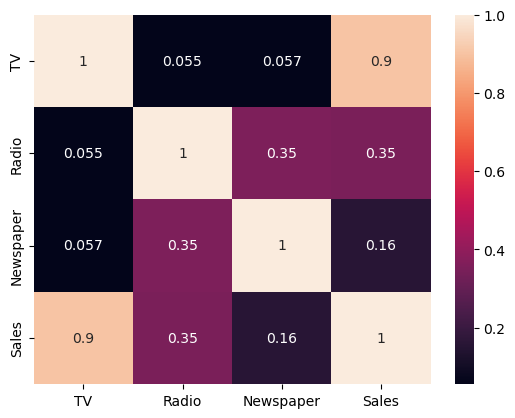

In [829]:
plt.figure()
sns.heatmap(dataset.corr(),annot=True)
plt.show()

# I. Prédire les ventes en fonction des dépenses publicitaires en TV  ( Sales en fonction TV)

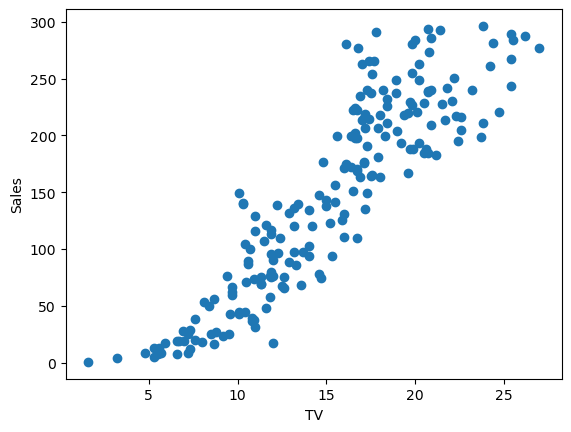

In [830]:
plt.plot(dataset["Sales"],dataset["TV"],'o')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

In [831]:
x=dataset.TV
y=dataset.Sales
x.shape

(200,)

In [832]:
y.shape

(200,)

In [833]:
X=dataset.TV.values
Y=dataset.Sales.values
X

array([230.1,  44.5,  17.2, 151.5, 180.8,   8.7,  57.5, 120.2,   8.6,
       199.8,  66.1, 214.7,  23.8,  97.5, 204.1, 195.4,  67.8, 281.4,
        69.2, 147.3, 218.4, 237.4,  13.2, 228.3,  62.3, 262.9, 142.9,
       240.1, 248.8,  70.6, 292.9, 112.9,  97.2, 265.6,  95.7, 290.7,
       266.9,  74.7,  43.1, 228. , 202.5, 177. , 293.6, 206.9,  25.1,
       175.1,  89.7, 239.9, 227.2,  66.9, 199.8, 100.4, 216.4, 182.6,
       262.7, 198.9,   7.3, 136.2, 210.8, 210.7,  53.5, 261.3, 239.3,
       102.7, 131.1,  69. ,  31.5, 139.3, 237.4, 216.8, 199.1, 109.8,
        26.8, 129.4, 213.4,  16.9,  27.5, 120.5,   5.4, 116. ,  76.4,
       239.8,  75.3,  68.4, 213.5, 193.2,  76.3, 110.7,  88.3, 109.8,
       134.3,  28.6, 217.7, 250.9, 107.4, 163.3, 197.6, 184.9, 289.7,
       135.2, 222.4, 296.4, 280.2, 187.9, 238.2, 137.9,  25. ,  90.4,
        13.1, 255.4, 225.8, 241.7, 175.7, 209.6,  78.2,  75.1, 139.2,
        76.4, 125.7,  19.4, 141.3,  18.8, 224. , 123.1, 229.5,  87.2,
         7.8,  80.2,

In [834]:
X.shape

(200,)

In [835]:
x=dataset.TV.values.reshape(200,1)
y=dataset.Sales.values.reshape(200,1)

In [836]:
print(x.shape)
print(y.shape)

(200, 1)
(200, 1)


In [837]:
# X=np.hstack((x,(np.ones(x.shape))))
# X

array([[230.1,   1. ],
       [ 44.5,   1. ],
       [ 17.2,   1. ],
       [151.5,   1. ],
       [180.8,   1. ],
       [  8.7,   1. ],
       [ 57.5,   1. ],
       [120.2,   1. ],
       [  8.6,   1. ],
       [199.8,   1. ],
       [ 66.1,   1. ],
       [214.7,   1. ],
       [ 23.8,   1. ],
       [ 97.5,   1. ],
       [204.1,   1. ],
       [195.4,   1. ],
       [ 67.8,   1. ],
       [281.4,   1. ],
       [ 69.2,   1. ],
       [147.3,   1. ],
       [218.4,   1. ],
       [237.4,   1. ],
       [ 13.2,   1. ],
       [228.3,   1. ],
       [ 62.3,   1. ],
       [262.9,   1. ],
       [142.9,   1. ],
       [240.1,   1. ],
       [248.8,   1. ],
       [ 70.6,   1. ],
       [292.9,   1. ],
       [112.9,   1. ],
       [ 97.2,   1. ],
       [265.6,   1. ],
       [ 95.7,   1. ],
       [290.7,   1. ],
       [266.9,   1. ],
       [ 74.7,   1. ],
       [ 43.1,   1. ],
       [228. ,   1. ],
       [202.5,   1. ],
       [177. ,   1. ],
       [293.6,   1. ],
       [206

In [838]:
print(x.shape)
print(y.shape)

(200, 1)
(200, 1)


### découpage du dataset en dataset d'entrainement et dataset de test

In [839]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 1)
(40, 1)
(160, 1)
(40, 1)


In [840]:
X_train=np.hstack((x_train,(np.ones(x_train.shape))))
X_test=np.hstack((x_test,(np.ones(x_test.shape))))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 2)
(40, 2)
(160, 1)
(40, 1)


In [841]:
np.random.seed(0) # pour produire toujours le meme vecteur theta aléatoire
theta=np.random.randn(2,1)
print('Theta:',theta)

Theta: [[1.76405235]
 [0.40015721]]


## 2. Modèle Linéaire
On implémente un modèle selon l'équation matricielle F=X.θ et puis on teste le modèle initiale défini par la valeur initiale de θ qu'on a initialisé d'une manière aléatoire.

In [842]:
def model(X, theta):
    return X.dot(theta)

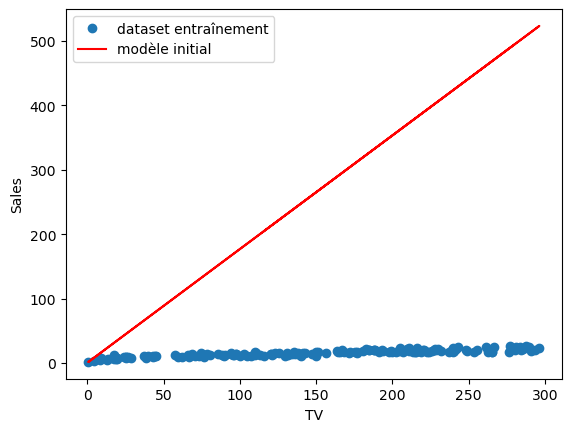

In [843]:
plt.plot(x_train,y_train,'o',label='dataset entraînement')
plt.plot(x_train, model(X_train, theta), c='r',label='modèle initial')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()
plt.show()

## 3. Fonction coût : Erreur Quadratique Moyenne
On mesure les erreurs du modele sur le Dataset X, y en implémenterl'erreur quadratique moyenne, Mean Squared Error (MSE) en anglais.

In [844]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [845]:
cost_function(X_train, y_train, theta)

41517.355521861

In [846]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [847]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

In [848]:
n_iterations = 1000000
learning_rate = 0.00001

theta_final, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, n_iterations)

## 4. Phase d'entrainement
On définit un nombre d'itérations, ainsi qu'un pas d'apprentissage α. Une fois le modele entrainé, on observe les resultats par rapport a notre Dataset

In [849]:
cost_history # l'historique de la fonction coût qu'on va afficher par la suite. on remarque que sa valeur déminue et c'est ça l'objectif

array([2.05872454e+04, 1.02105810e+04, 5.06607083e+03, ...,
       2.54289005e+00, 2.54288984e+00, 2.54288963e+00])

In [850]:
theta_final # voici les parametres du modele une fois que la machine a été entrainée

array([[0.05854572],
       [6.40305225]])

In [851]:
theta_final[0]

array([0.05854572])

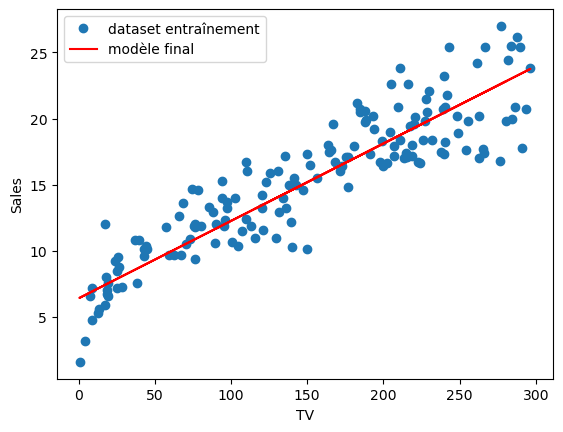

In [852]:
plt.plot(x_train,y_train,'o',label='dataset entraînement')
plt.plot(x_train, model(X_train, theta_final), c='r',label='modèle final')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()
plt.show()

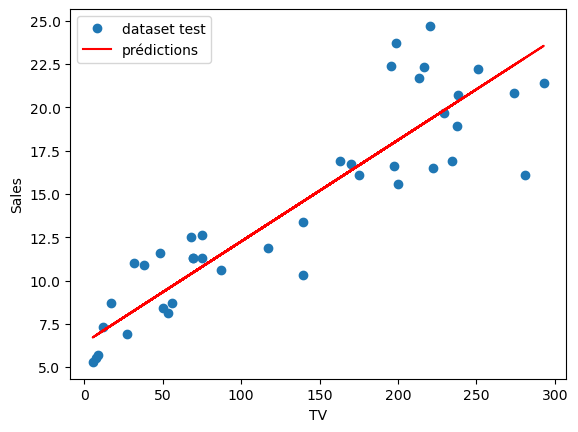

In [853]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X_test, theta_final)

# Affichage des résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.plot(x_test,y_test,'o',label='dataset test')
plt.plot(x_test,predictions , c='r',label='prédictions')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()
plt.show()

## 5. Courbe d'apprentissage

   Pour vérifier si notre algorithme de Descente de gradient a bien fonctionné, on observe l'évolution de la fonction cout a travers les itérations. On est sensé obtenir une courbe qui diminue a chaque itération jusqu'a stagner a un niveau minimal (proche de zéro). Si la courbe ne suit pas ce motif, alors le pas learning_rate est peut-etre trop élevé, il faut prendre un pas plus faible.

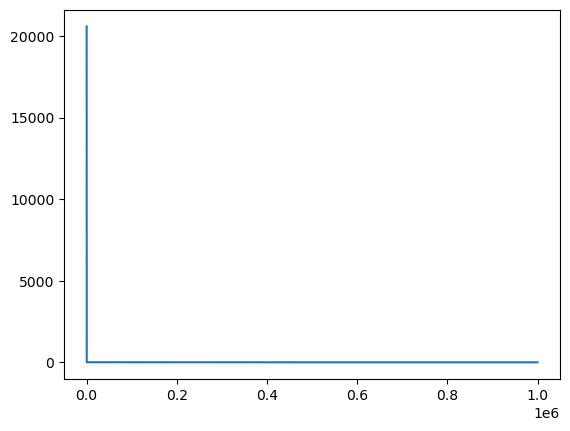

In [854]:
plt.plot(range(n_iterations), cost_history)
plt.show()

## 6. Evaluation du modèle - Coefficient de détermination

   Le coefficient de détermination est un indice de la qualité de la prédiction de la régression linéaire. Le coefficient de détermination se situe entre 0 et 1. Plus il est proche de 1, plus la régression linéaire est en adéquation avec les données collectées

In [855]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [856]:
predictions = model(X_train, theta_final)
tr1 = coef_determination(y_train, predictions) # predictions=model(X_train,theta_final)
print(tr1)

0.8102276883921964


In [857]:
predictions = model(X_test, theta_final)
ts1 = coef_determination(y_test, predictions) # predictions=model(X_test,theta_final)
print(ts1)

0.8005190051199944


# II. Prédire les ventes en fonction des dépenses publicitaires en Radio  ( Sales en fonction Radio)

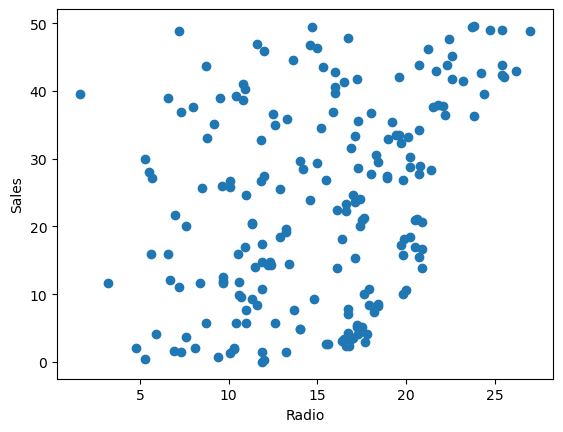

In [858]:
plt.plot(dataset["Sales"],dataset["Radio"],'o')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.show()

In [859]:
x=dataset.Radio
y=dataset.Sales
x.shape

(200,)

In [860]:
X=dataset.Radio.values
Y=dataset.Sales.values
X

array([37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6,  2.1,  2.6,  5.8,
       24. , 35.1,  7.6, 32.9, 47.7, 36.6, 39.6, 20.5, 23.9, 27.7,  5.1,
       15.9, 16.9, 12.6,  3.5, 29.3, 16.7, 27.1, 16. , 28.3, 17.4,  1.5,
       20. ,  1.4,  4.1, 43.8, 49.4, 26.7, 37.7, 22.3, 33.4, 27.7,  8.4,
       25.7, 22.5,  9.9, 41.5, 15.8, 11.7,  3.1,  9.6, 41.7, 46.2, 28.8,
       49.4, 28.1, 19.2, 49.6, 29.5,  2. , 42.7, 15.5, 29.6, 42.8,  9.3,
       24.6, 14.5, 27.5, 43.9, 30.6, 14.3, 33. ,  5.7, 24.6, 43.7,  1.6,
       28.5, 29.9,  7.7, 26.7,  4.1, 20.3, 44.5, 43. , 18.4, 27.5, 40.6,
       25.5, 47.8,  4.9,  1.5, 33.5, 36.5, 14. , 31.6,  3.5, 21. , 42.3,
       41.7,  4.3, 36.3, 10.1, 17.2, 34.3, 46.4, 11. ,  0.3,  0.4, 26.9,
        8.2, 38. , 15.4, 20.6, 46.8, 35. , 14.3,  0.8, 36.9, 16. , 26.8,
       21.7,  2.4, 34.6, 32.3, 11.8, 38.9,  0. , 49. , 12. , 39.6,  2.9,
       27.2, 33.5, 38.6, 47. , 39. , 28.9, 25.9, 43.9, 17. , 35.4, 33.2,
        5.7, 14.8,  1.9,  7.3, 49. , 40.3, 25.8, 13

In [861]:
X.shape

(200,)

In [862]:
x=dataset.Radio.values.reshape(200,1)
y=dataset.Sales.values.reshape(200,1)

In [863]:
print(x.shape)
print(y.shape)

(200, 1)
(200, 1)


In [864]:
X=np.hstack((x,(np.ones(x.shape))))
X

array([[37.8,  1. ],
       [39.3,  1. ],
       [45.9,  1. ],
       [41.3,  1. ],
       [10.8,  1. ],
       [48.9,  1. ],
       [32.8,  1. ],
       [19.6,  1. ],
       [ 2.1,  1. ],
       [ 2.6,  1. ],
       [ 5.8,  1. ],
       [24. ,  1. ],
       [35.1,  1. ],
       [ 7.6,  1. ],
       [32.9,  1. ],
       [47.7,  1. ],
       [36.6,  1. ],
       [39.6,  1. ],
       [20.5,  1. ],
       [23.9,  1. ],
       [27.7,  1. ],
       [ 5.1,  1. ],
       [15.9,  1. ],
       [16.9,  1. ],
       [12.6,  1. ],
       [ 3.5,  1. ],
       [29.3,  1. ],
       [16.7,  1. ],
       [27.1,  1. ],
       [16. ,  1. ],
       [28.3,  1. ],
       [17.4,  1. ],
       [ 1.5,  1. ],
       [20. ,  1. ],
       [ 1.4,  1. ],
       [ 4.1,  1. ],
       [43.8,  1. ],
       [49.4,  1. ],
       [26.7,  1. ],
       [37.7,  1. ],
       [22.3,  1. ],
       [33.4,  1. ],
       [27.7,  1. ],
       [ 8.4,  1. ],
       [25.7,  1. ],
       [22.5,  1. ],
       [ 9.9,  1. ],
       [41.5,

In [865]:
print(x.shape)
print(y.shape)

(200, 1)
(200, 1)


In [866]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 1)
(40, 1)
(160, 1)
(40, 1)


In [867]:
X_train=np.hstack((x_train,(np.ones(x_train.shape))))
X_test=np.hstack((x_test,(np.ones(x_test.shape))))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 2)
(40, 2)
(160, 1)
(40, 1)


## 2. Modèle Linéaire
On implémente un modèle selon l'équation matricielle F=X.θ et puis on teste le modèle initiale défini par la valeur initiale de θ qu'on a initialisé d'une manière aléatoire.

In [868]:
def model(X, theta):
    return X.dot(theta)

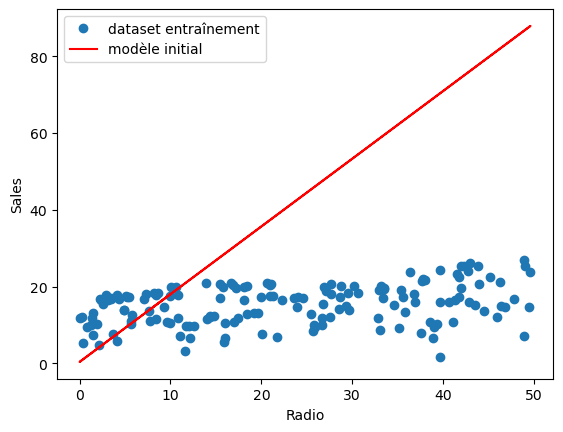

In [869]:
plt.plot(x_train,y_train,'o',label='dataset entraînement')
plt.plot(x_train, model(X_train, theta), c='r',label='modèle initial')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.legend()
plt.show()

## 3. Fonction coût : Erreur Quadratique Moyenne
On mesure les erreurs du modele sur le Dataset X, y en implémenterl'erreur quadratique moyenne, Mean Squared Error (MSE) en anglais.

In [870]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [871]:
cost_function(X_train, y_train, theta)

629.3835846941762

In [872]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [873]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

In [874]:
n_iterations = 1000000
learning_rate = 0.00001

theta_final, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, n_iterations)

## 4. Phase d'entrainement
On définit un nombre d'itérations, ainsi qu'un pas d'apprentissage α. Une fois le modele entrainé, on observe les resultats par rapport a notre Dataset

In [875]:
cost_history # l'historique de la fonction coût qu'on va afficher par la suite. on remarque que sa valeur déminue et c'est ça l'objectif

array([620.5797391 , 611.90602538, 603.36052   , ...,  11.89314942,
        11.89314906,  11.8931487 ])

In [876]:
theta_final # voici les parametres du modele une fois que la machine a été entrainée

array([[ 0.14002984],
       [11.93689611]])

In [877]:
theta_final[0]

array([0.14002984])

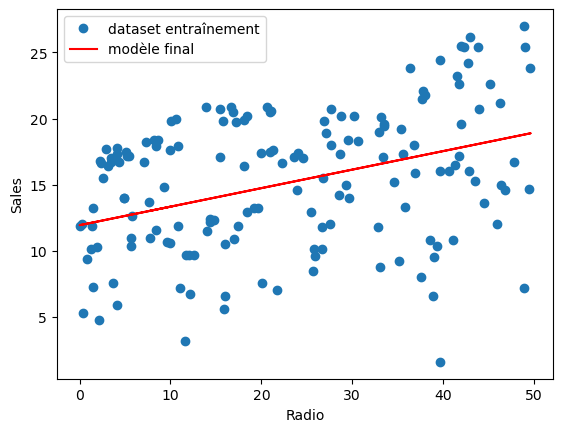

In [878]:
plt.plot(x_train,y_train,'o',label='dataset entraînement')
plt.plot(x_train, model(X_train, theta_final), c='r',label='modèle final')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.legend()
plt.show()

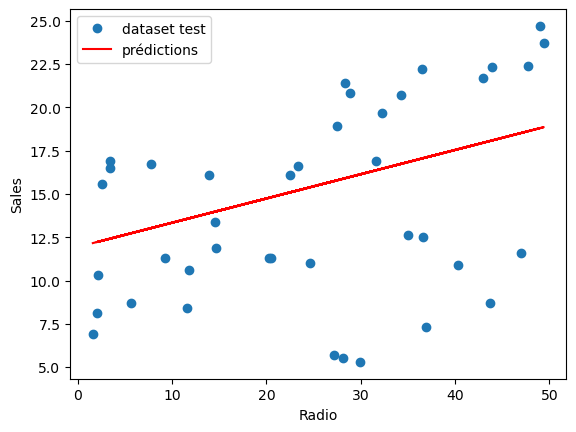

In [879]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X_test, theta_final)

# Affichage des résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.plot(x_test,y_test,'o',label='dataset test')
plt.plot(x_test,predictions , c='r',label='prédictions')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.legend()
plt.show()

## 5. Courbe d'apprentissage

   Pour vérifier si notre algorithme de Descente de gradient a bien fonctionné, on observe l'évolution de la fonction cout a travers les itérations. On est sensé obtenir une courbe qui diminue a chaque itération jusqu'a stagner a un niveau minimal (proche de zéro). Si la courbe ne suit pas ce motif, alors le pas learning_rate est peut-etre trop élevé, il faut prendre un pas plus faible.

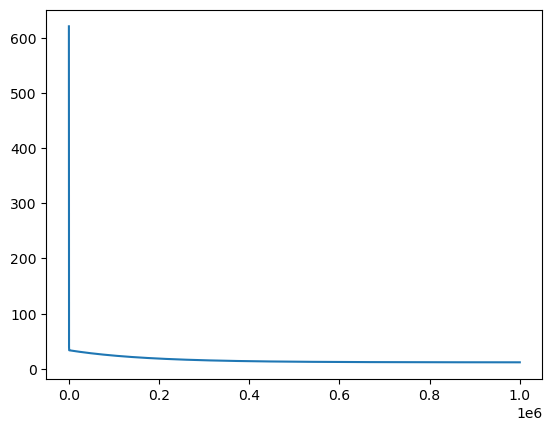

In [880]:
plt.plot(range(n_iterations), cost_history)
plt.show()

## 6. Evaluation du modèle - Coefficient de détermination

   Le coefficient de détermination est un indice de la qualité de la prédiction de la régression linéaire. Le coefficient de détermination se situe entre 0 et 1. Plus il est proche de 1, plus la régression linéaire est en adéquation avec les données collectées

In [881]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [882]:
predictions = model(X_train, theta_final)
tr2 = coef_determination(y_train, predictions) # predictions=model(X_train,theta_final)
print(tr2)

0.11243087789278261


In [883]:
predictions = model(X_test, theta_final)
ts2 = coef_determination(y_test, predictions) # predictions=model(X_test,theta_final)
print(ts2)

0.12422588638376608


# III. Prédire les ventes en fonction des dépenses publicitaires en Newspaper  ( Sales en fonction Newspaper)

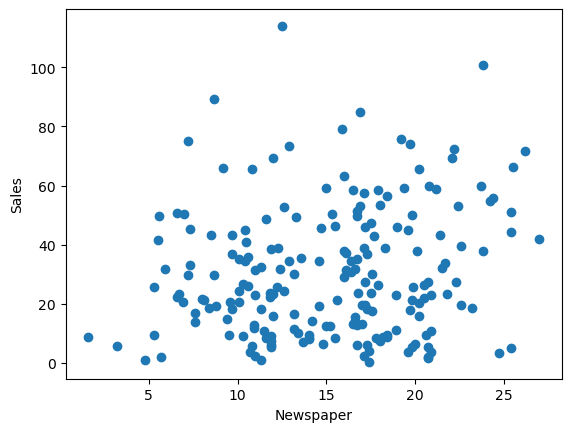

In [884]:
plt.plot(dataset["Sales"],dataset["Newspaper"],'o')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.show()

In [885]:
x=dataset.Newspaper
y=dataset.Sales
x.shape

(200,)

In [886]:
X=dataset.Newspaper.values
Y=dataset.Sales.values
X

array([ 69.2,  45.1,  69.3,  58.5,  58.4,  75. ,  23.5,  11.6,   1. ,
        21.2,  24.2,   4. ,  65.9,   7.2,  46. ,  52.9, 114. ,  55.8,
        18.3,  19.1,  53.4,  23.5,  49.6,  26.2,  18.3,  19.5,  12.6,
        22.9,  22.9,  40.8,  43.2,  38.6,  30. ,   0.3,   7.4,   8.5,
         5. ,  45.7,  35.1,  32. ,  31.6,  38.7,   1.8,  26.4,  43.3,
        31.5,  35.7,  18.5,  49.9,  36.8,  34.6,   3.6,  39.6,  58.7,
        15.9,  60. ,  41.4,  16.6,  37.7,   9.3,  21.4,  54.7,  27.3,
         8.4,  28.9,   0.9,   2.2,  10.2,  11. ,  27.2,  38.7,  31.7,
        19.3,  31.3,  13.1,  89.4,  20.7,  14.2,   9.4,  23.1,  22.3,
        36.9,  32.5,  35.6,  33.8,  65.7,  16. ,  63.2,  73.4,  51.4,
         9.3,  33. ,  59. ,  72.3,  10.9,  52.9,   5.9,  22. ,  51.2,
        45.9,  49.8, 100.9,  21.4,  17.9,   5.3,  59. ,  29.7,  23.2,
        25.6,   5.5,  56.5,  23.2,   2.4,  10.7,  34.5,  52.7,  25.6,
        14.8,  79.2,  22.3,  46.2,  50.4,  15.6,  12.4,  74.2,  25.9,
        50.6,   9.2,

In [887]:
X.shape

(200,)

In [890]:
x=dataset.Newspaper.values.reshape(200,1)
y=dataset.Sales.values.reshape(200,1)

In [891]:
print(x.shape)
print(y.shape)

(200, 1)
(200, 1)


In [892]:
X=np.hstack((x,(np.ones(x.shape))))
X

array([[ 69.2,   1. ],
       [ 45.1,   1. ],
       [ 69.3,   1. ],
       [ 58.5,   1. ],
       [ 58.4,   1. ],
       [ 75. ,   1. ],
       [ 23.5,   1. ],
       [ 11.6,   1. ],
       [  1. ,   1. ],
       [ 21.2,   1. ],
       [ 24.2,   1. ],
       [  4. ,   1. ],
       [ 65.9,   1. ],
       [  7.2,   1. ],
       [ 46. ,   1. ],
       [ 52.9,   1. ],
       [114. ,   1. ],
       [ 55.8,   1. ],
       [ 18.3,   1. ],
       [ 19.1,   1. ],
       [ 53.4,   1. ],
       [ 23.5,   1. ],
       [ 49.6,   1. ],
       [ 26.2,   1. ],
       [ 18.3,   1. ],
       [ 19.5,   1. ],
       [ 12.6,   1. ],
       [ 22.9,   1. ],
       [ 22.9,   1. ],
       [ 40.8,   1. ],
       [ 43.2,   1. ],
       [ 38.6,   1. ],
       [ 30. ,   1. ],
       [  0.3,   1. ],
       [  7.4,   1. ],
       [  8.5,   1. ],
       [  5. ,   1. ],
       [ 45.7,   1. ],
       [ 35.1,   1. ],
       [ 32. ,   1. ],
       [ 31.6,   1. ],
       [ 38.7,   1. ],
       [  1.8,   1. ],
       [ 26

In [893]:
print(x.shape)
print(y.shape)

(200, 1)
(200, 1)


In [894]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 1)
(40, 1)
(160, 1)
(40, 1)


In [895]:
X_train=np.hstack((x_train,(np.ones(x_train.shape))))
X_test=np.hstack((x_test,(np.ones(x_test.shape))))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 2)
(40, 2)
(160, 1)
(40, 1)


## 2. Modèle Linéaire
On implémente un modèle selon l'équation matricielle F=X.θ et puis on teste le modèle initiale défini par la valeur initiale de θ qu'on a initialisé d'une manière aléatoire.

In [896]:
def model(X, theta):
    return X.dot(theta)

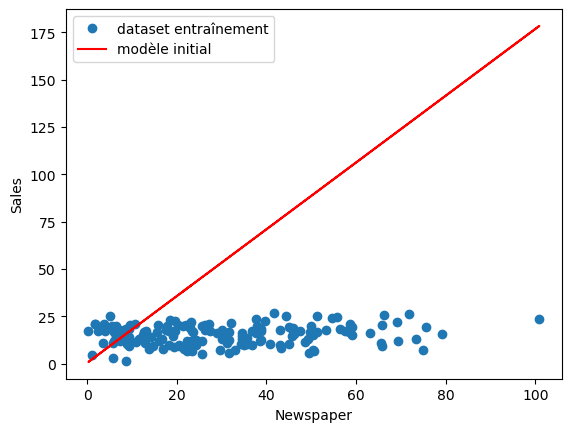

In [897]:
plt.plot(x_train,y_train,'o',label='dataset entraînement')
plt.plot(x_train, model(X_train, theta), c='r',label='modèle initial')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.legend()
plt.show()

## 3. Fonction coût : Erreur Quadratique Moyenne
On mesure les erreurs du modele sur le Dataset X, y en implémenterl'erreur quadratique moyenne, Mean Squared Error (MSE) en anglais.

In [898]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [899]:
cost_function(X_train, y_train, theta)

1343.940872753667

In [900]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [901]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

In [902]:
n_iterations = 1000000
learning_rate = 0.00001

theta_final, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, n_iterations)

## 4. Phase d'entrainement
On définit un nombre d'itérations, ainsi qu'un pas d'apprentissage α. Une fois le modele entrainé, on observe les resultats par rapport a notre Dataset

In [903]:
cost_history # l'historique de la fonction coût qu'on va afficher par la suite. on remarque que sa valeur déminue et c'est ça l'objectif

array([1310.12670842, 1277.19160801, 1245.11271845, ...,   13.1720498 ,
         13.17204945,   13.1720491 ])

In [904]:
theta_final # voici les parametres du modele une fois que la machine a été entrainée

array([[ 0.05088917],
       [13.61863356]])

In [905]:
theta_final[0]

array([0.05088917])

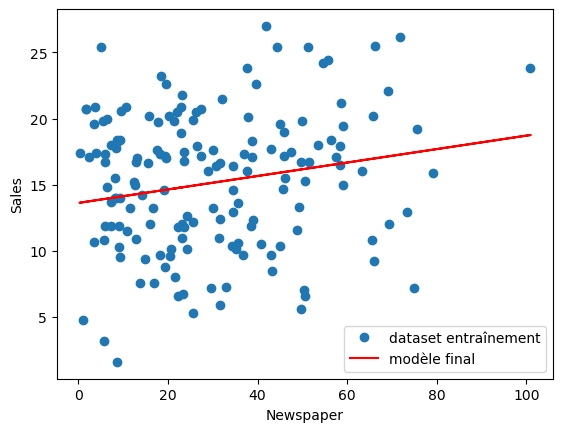

In [906]:
plt.plot(x_train,y_train,'o',label='dataset entraînement')
plt.plot(x_train, model(X_train, theta_final), c='r',label='modèle final')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.legend()
plt.show()

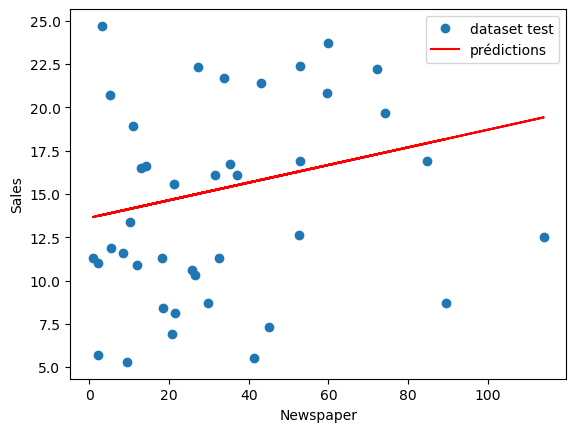

In [907]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X_test, theta_final)

# Affichage des résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.plot(x_test,y_test,'o',label='dataset test')
plt.plot(x_test,predictions , c='r',label='prédictions')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.legend()
plt.show()

## 5. Courbe d'apprentissage

   Pour vérifier si notre algorithme de Descente de gradient a bien fonctionné, on observe l'évolution de la fonction cout a travers les itérations. On est sensé obtenir une courbe qui diminue a chaque itération jusqu'a stagner a un niveau minimal (proche de zéro). Si la courbe ne suit pas ce motif, alors le pas learning_rate est peut-etre trop élevé, il faut prendre un pas plus faible.

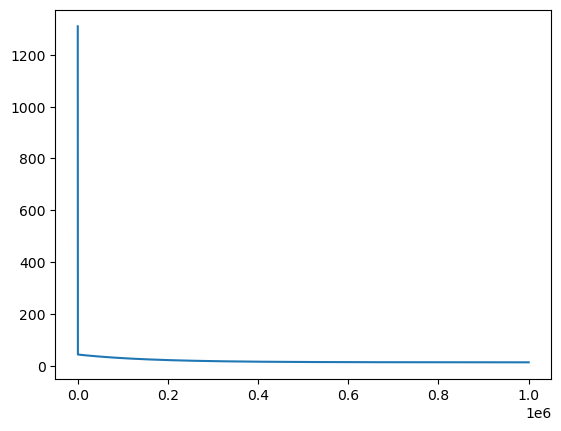

In [908]:
plt.plot(range(n_iterations), cost_history)
plt.show()

## 6. Evaluation du modèle - Coefficient de détermination

   Le coefficient de détermination est un indice de la qualité de la prédiction de la régression linéaire. Le coefficient de détermination se situe entre 0 et 1. Plus il est proche de 1, plus la régression linéaire est en adéquation avec les données collectées

In [909]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [910]:
predictions = model(X_train, theta_final)
tr3 = coef_determination(y_train, predictions) # predictions=model(X_train,theta_final)
print(tr3)

0.016988322506729103


In [911]:
predictions = model(X_test, theta_final)
ts3 = coef_determination(y_test, predictions) # predictions=model(X_test,theta_final)
print(ts3)

0.014945376940943889


# Conclusion

### Coeff de determination d'entrainement pour Sales en fonction TV

In [912]:
print(tr1)

0.8102276883921964


### Coeff de determination de test pour Sales en fonction TV

In [913]:
print(ts1)

0.8005190051199944


### Coeff de determination d'entrainement pour Sales en fonction Radio

In [914]:
print(tr2)

0.11243087789278261


### Coeff de determination de test pour Sales en fonction Radio

In [915]:
print(ts2)

0.12422588638376608


### Coeff de determination d'entrainement pour Sales en fonction Newspaper

In [916]:
print(tr3)

0.016988322506729103


### Coeff de determination de test pour Sales en fonction Newspaper

In [917]:
print(ts3)

0.014945376940943889


In [918]:
from tabulate import tabulate

tableau = [
    ["Type", "Coeff de deter de test", "Coeff de deter d'entrainement","Correlation"],
    ["TV", ts1, tr1, 0.9],
    ["Radio", ts2, tr2, 0.3],
    ["Newspaper", ts3, tr3, 0.1]
]

print(tabulate(tableau, headers="firstrow"))

Type         Coeff de deter de test    Coeff de deter d'entrainement    Correlation
---------  ------------------------  -------------------------------  -------------
TV                        0.800519                         0.810228             0.9
Radio                     0.124226                         0.112431             0.3
Newspaper                 0.0149454                        0.0169883            0.1
